# Analysis for the Franck-Hertz Experiment

In this experiment we recreated the Franck-Hertz experiment with a Mercury tube and a 
Neon tube. These tubes have an anode, a cathode, and a metal grid close to the anode. Neon is 
already in a gaseous state in the tube while Mercury is heated up to control the number of Hg 
atoms in the tube. A voltage is applied between the anode and the cathode causing electrons to 
travel from one end to the other. In the process these electrons collide elastically with the 
gaseous Hg and Ne, gaining kinetic energy in the process. When an electron has sufficient
energy, an inelastic collision occurs. A ground state electron on Hg or Ne gets excited to the first 
excited state and the travelling electron loses all kinetic energy. If the inelastic collision occurs 
close to the grid, then the electron enters back into the circuit through the grid skipping the 
ammeter. An X-Y recorder is used to measure the current vs voltage curve. This curve consists 
of a series of peaks and troughs which correspond to the inelastic collisions. From the spacing 
between peaks and troughs we can calculate the energy between the ground state and the first 
excited states in Hg and Ne, using the average spacing method and the RSB method. This
experiment was originally performed by James Franck and Gustav Hertz in 1914. The 
experiment was able to provide evidence for the quantization of electron orbitals in atoms and
give a measurement for the energy spacing in orbitals. This experiment is still studied today as 
there are many questions that have gone unanswered.

# Result Analysis

From these results we can see that the RSB method achieved values closer to the 
accepted result than the traditional method. The range of data for Neon is large and is far from 
the accepted results in both the RSB and traditional method, however for Mercury the results 
from the RSB method are in good agreement with the accepted value. The traditional method 
overshoots the accepted value in the calculations. This comes from the fact that the spacing 
between consecutive peaks/troughs increases as the number of peaks/troughs increase. This 
causes the average to be high. We do not have an explanation for why this occurs. The RSB 
method has a way of correcting for this by including the mean free path traveled by the electrons. 
Another observation from the Frank-Hertz experiment is the band of lights that appear 
from the increase in voltage in the Neon tube. Several pinkish-orangish light bands appear in the 
Neon Franck-Hertz tube as the accelerating voltage is increased. These bands come from the 
excitations from the ground state to the first excited states caused from the inelastic collisions of 
Neon atoms and electrons. As these excited electrons return to the ground state the emit a photon 
of energy corresponding to the band gap which is in the visible wavelengths. These lights first 
appear near the grid in the Ne tube right as the current is starting to drop on the IV curve. This is 
a visual indicator that the inelastic collisions are occurring near the grid and therefore the 
traveling electrons have low energy and will enter back into the circuit through the grid, skipping 
the ammeter and causing a dip in current measured. The bands reach their brightest point when 
the trough is at a minimum and the current starts to increase the further away the lights move 
from the grid. This is because there is more space between the point where the inelastic 
collisions occur and the grid, allowing more electrons to reach enough energy to pass through the 
grid and reach the ammeter.

The last data from this experiment is the use of a lock-in amp to measure the derivative of 
the IV curve. From this we can see that there are a series of small bumps in the derivative of the 
Neon IV curve. Taking the position of these bumps and converting them into voltages it is 
possible to find the difference in voltage from one peak to the next. This difference is the 
difference of energy from the lowest 3p and 3s states. From our data we calculated a 3s-3p 
difference of 1.7 eV which is exactly what the accepted value of the separation is


In [41]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import LinearModel
from lmfit.models import QuadraticModel
%matplotlib inline

## Read in the Franck-Hertz Data

In [42]:
FHdata = pd.read_excel('Lab 3 Data.xlsx',sheet_name=None)      
#FHdata.keys()
Hg_cal = FHdata['Hg Calibration']
Hg_data = FHdata['Hg Peaks and Troughs']
Ne_cal = FHdata['Ne Calibration']
Ne_data = FHdata['Ne Peaks and Troughs']
Ne_small = FHdata['Ne Small Features']

## Neon Analysis

In [43]:
Ne_cal

,Line Number,Voltage,Mark number
0,1,0,0.8
1,2,10,20.9
2,3,20,41.1
3,4,30,61.2
4,5,40,81.1
5,6,50,101.1
6,7,60,121.0
7,8,70,140.8


Parameters([('slope', <Parameter 'slope', value=0.4998762505830502 +/- 0.000628, bounds=[-inf:inf]>), ('intercept', <Parameter 'intercept', value=-0.49121379139654964 +/- 0.0531, bounds=[-inf:inf]>)])


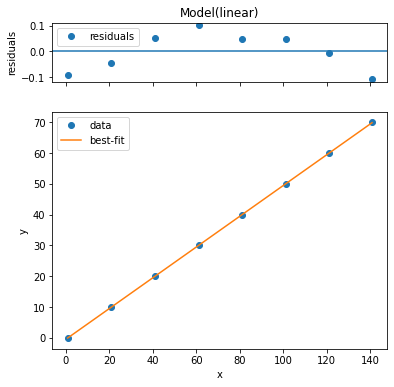

In [44]:
def model_fit_and_plot(xdata,ydata,model=LinearModel()):
    
    param_guess = model.guess(ydata, x = xdata)
    model_fit = model.fit(ydata, param_guess, x = xdata)

    model_fit.plot();
    return model_fit.params

Ne_fit = model_fit_and_plot(Ne_cal['Mark number'],Ne_cal['Voltage'])
print(Ne_fit)

In [45]:
def mark_to_volt(mark_number):
    model = LinearModel()
    voltage = model.eval(Ne_fit,x=mark_number)
    return voltage

In [46]:
Ne_data['Peak Voltage'] = mark_to_volt(Ne_data['Peak'])
Ne_data['Trough Voltage'] = mark_to_volt(Ne_data['Trough'])
Ne_data

,Number,Peak,Trough,Peak Voltage,Trough Voltage
0,1,27.8,43.3,13.405346,21.153428
1,2,62.0,77.6,30.501114,38.299183
2,3,98.2,115.5,48.596634,57.244493
3,4,137.7,0.0,68.341746,-0.491214


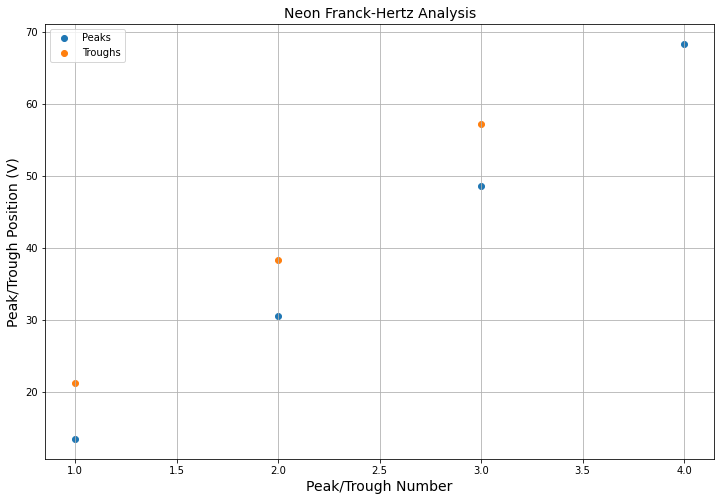

In [47]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

xdata = Ne_data['Number']
ydata_peak = Ne_data['Peak Voltage']
ydata_trough = Ne_data['Trough Voltage'][Ne_data['Trough Voltage'] > 0]
plt.scatter(xdata, ydata_peak, label = 'Peaks')
plt.scatter(xdata[:3], ydata_trough, label = 'Troughs')

plt.legend();

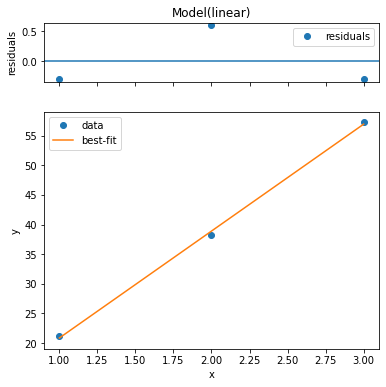

In [48]:
# Troughs line fit
Ne_trough_line = model_fit_and_plot(xdata[:3],Ne_data['Trough Voltage'][Ne_data['Trough Voltage'] > 0])

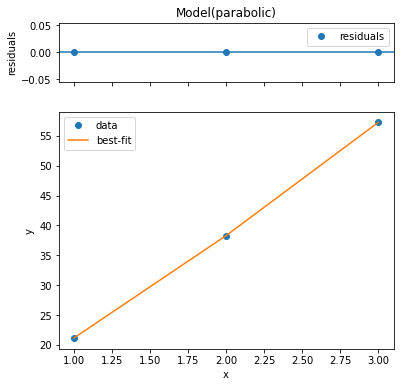

In [49]:
# Troughs quadratic
Ne_trough_quad = model_fit_and_plot(xdata[:3],Ne_data['Trough Voltage'][Ne_data['Trough Voltage'] > 0 ], model=QuadraticModel())

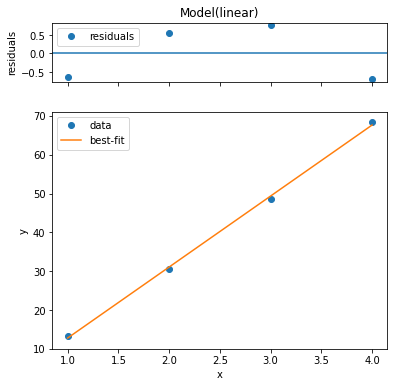

In [50]:
# Peaks line fit
Ne_peak_line = model_fit_and_plot(xdata,Ne_data['Peak Voltage'])

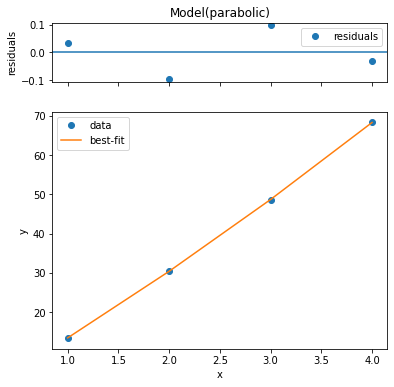

In [51]:
# Peaks quadratic
Ne_peak_quad = model_fit_and_plot(xdata,Ne_data['Peak Voltage'],model = QuadraticModel())

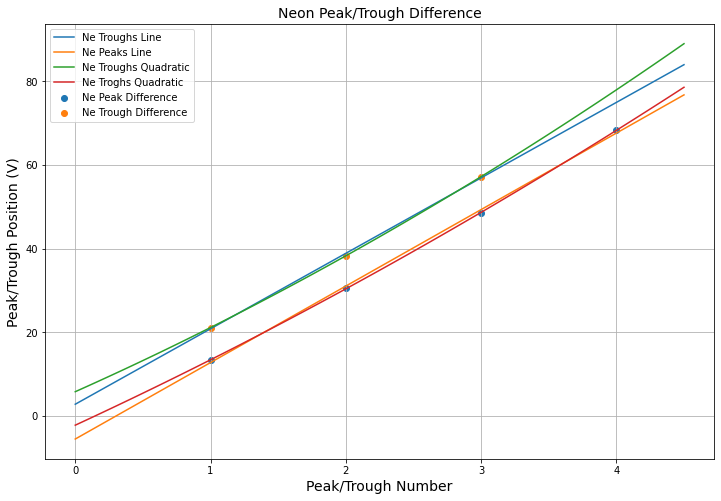

In [52]:
xfit = np.linspace(0,4.5,100)

line_model = LinearModel()
trough_line = line_model.eval(Ne_trough_line,x=xfit)
peak_line = line_model.eval(Ne_peak_line,x=xfit)

quad_model = QuadraticModel()
trough_quad = quad_model.eval(Ne_trough_quad,x=xfit)
peak_quad = quad_model.eval(Ne_peak_quad,x=xfit)

plt.figure(figsize=(12,8))
plt.grid()
plt.title('Neon Peak/Trough Difference',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

plt.scatter(xdata,Ne_data['Peak Voltage'], label = 'Ne Peak Difference')
plt.scatter(xdata[:3],Ne_data['Trough Voltage'][Ne_data['Trough Voltage'] > 0], label = 'Ne Trough Difference')

plt.plot(xfit,trough_line, label = 'Ne Troughs Line')
plt.plot(xfit,peak_line, label = 'Ne Peaks Line')

plt.plot(xfit,trough_quad, label = 'Ne Troughs Quadratic')
plt.plot(xfit,peak_quad, label = 'Ne Troghs Quadratic')

plt.legend();

In [53]:
delta_Ne_peak = np.diff(Ne_data['Peak Voltage'])
delta_Ne_trough = np.diff(Ne_data['Trough Voltage'][Ne_data['Trough Voltage'] > 0])

print('List of Neon peak differences (V):', delta_Ne_peak)
print('List of Neon trough differences (V):', delta_Ne_trough)

List of Neon peak differences (V): [17.09576777 18.09552027 19.7451119 ]
List of Neon trough differences (V): [17.14575539 18.9453099 ]


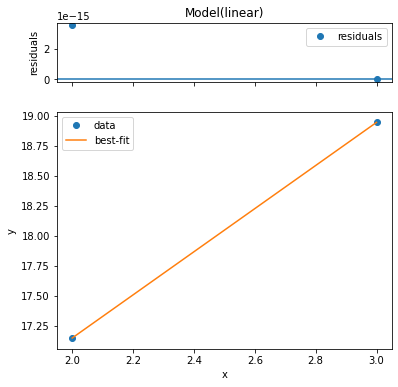

In [54]:
# Fit of line to trough diffs
delta_fit_trough = model_fit_and_plot(xdata[1:3],delta_Ne_trough)

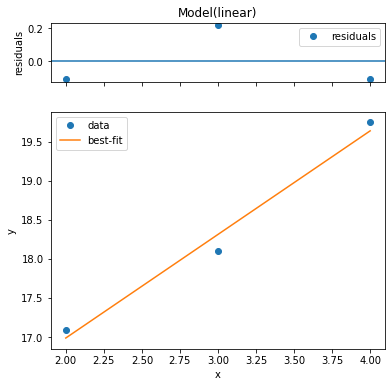

In [55]:
# Next, peak diffs
delta_fit_peak = model_fit_and_plot(xdata[1:4],delta_Ne_peak)

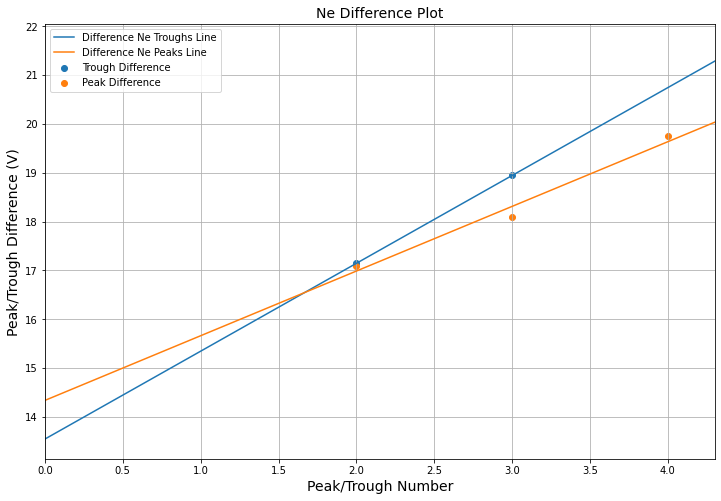

In [56]:
line_model = LinearModel()
delta_trough_line = line_model.eval(delta_fit_trough,x=xfit)
delta_peak_line = line_model.eval(delta_fit_peak,x=xfit)

plt.figure(figsize=(12,8))
plt.grid()
plt.title('Ne Difference Plot',fontsize=14)
plt.ylabel('Peak/Trough Difference (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
plt.xlim(0,4.3)

plt.plot(xfit,delta_trough_line, label = 'Difference Ne Troughs Line')
plt.plot(xfit,delta_peak_line, label = 'Difference Ne Peaks Line')

plt.scatter(xdata[1:3],delta_Ne_trough, label = 'Trough Difference')
plt.scatter(xdata[1:4],delta_Ne_peak, label = 'Peak Difference')

plt.legend();

## Final results for neon excited state

Compare fit coefficients from the quadratic to similar from the RSB difference method.  Then calculate values for the lowest excited state of Neon from the three methods of analyzing the data set: simple average peak spacing, and RSB calculation from the results of the other two fits.

From the RSB analysis, expect energy troughs to follow

$$ E_n = E_a\frac{\lambda}{L}n^2 + E_an + c  = an^2 + bn +c$$

where $c$ is a constant, $n$ is the trough number, $\lambda/L$ is the ratio of the mean free path to the total travel distance from electrode to electrode, and $E_a$ is the lowest excited state.

Taking differences, RSB derive

$$ \Delta E(n) = E_{n} - E_{n-1} = E_a\left(1-\frac{\lambda}{L}\right) + E_a2\frac{\lambda}{L}n = p + mn$$

Thus, a quadratic fit to the trough positions should give $E_a$ as the linear-term coefficient, and a linear fit to  the differences in trough positions should give a line that evaluates to $E_a$ for $n=0.5$.

Further, if $m$ and $p$ are the slope and intercept of the linear fit to the differences, and $a$, $b$, and $c$ are the 2nd, 1st and 0th order coefficients in the quadratic fit to trough positions, then we expect $p=b-a$ and $m=2a$.

In [57]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')

p = delta_fit_trough['intercept'].value
m = delta_fit_trough['slope'].value

a = Ne_trough_quad['a'].value
b = Ne_trough_quad['b'].value
c = Ne_trough_quad['c'].value

print('p = b-a: {:.2f} = {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m = 2a: {:.2f} = {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\nPeaks analysis:')

p = delta_fit_peak['intercept'].value
m = delta_fit_peak['slope'].value

a = Ne_peak_quad['a'].value
b = Ne_peak_quad['b'].value
c = Ne_peak_quad['c'].value

print('p = b-a: {:.2f} = {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m = 2a: {:.2f} = {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

# Ea_trad_pk = unc.ufloat(delta_fit_peak['slope'].value,delta_fit_peak['slope'].stderr)
# Ea_trad_tr = unc.ufloat(delta_fit_trough['slope'].value,delta_fit_trough['slope'].stderr)
Ea_trad_tr = np.mean(delta_Ne_trough)
Ea_trad_pk = np.mean(delta_Ne_peak)

print('"Traditional" average peak spacing: {:.2f} V'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2f} V'.format(Ea_trad_tr))

Ea_quad_trough = Ne_trough_quad['b'].value
Ea_RSB_trough = delta_fit_trough['intercept'].value + delta_fit_trough['slope'].value/2

Ea_quad_peak = Ne_peak_quad['b'].value
Ea_RSB_peak = delta_fit_peak['intercept'].value + delta_fit_peak['slope'].value/2

print('\nRSB method using line fit to peak/trough position differences')
print('Trough: {:.2f} V'.format(Ea_RSB_trough))
print('Peak: {:.2f} V'.format(Ea_RSB_peak))

print('\nRSB method using quadratic fit to peak/trough positions')
print('Trough: {:.2f} V'.format(Ea_quad_trough))
print('Peak: {:.2f} V'.format(Ea_quad_peak))

CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p = b-a: 13.55 = 13.55 = 14.45-0.90
m = 2a: 1.80 = 1.80 = 2*0.90

Peaks analysis:
p = b-a: 14.34 = 14.32 = 14.98-0.66
m = 2a: 1.32 = 1.32 = 2*0.66


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 18.31 V
"Traditional" average trough spacing: 18.05 V

RSB method using line fit to peak/trough position differences
Trough: 14.45 V
Peak: 15.00 V

RSB method using quadratic fit to peak/trough positions
Trough: 14.45 V
Peak: 14.98 V


## Calculate the 3p-3s energy spacing

Calculate the differences between similar closely spaced features in the lock-in scan for neon.  Convert paper positions to voltages first, then take differences and make a list.  See if they are similar values.  Then take an average.

In [58]:
Ne_small['G1 Voltage'] = mark_to_volt(Ne_small['Group 1'])
Ne_small['G2 Voltage'] = mark_to_volt(Ne_small['Group 2'])
Ne_small['G3 Voltage'] = mark_to_volt(Ne_small['Group 3'])
Ne_small['G4 Voltage'] = mark_to_volt(Ne_small['Group 4'])
Ne_small

,Number,Group 1,Group 2,Group 3,Group 4,G1 Voltage,G2 Voltage,G3 Voltage,G4 Voltage
0,1,11.4,45.3,79.3,112.7,5.207375,22.153180,39.148973,55.844840
1,2,18.4,48.9,82.9,116.8,8.706509,23.952735,40.948527,57.894332
2,3,0.0,52.1,86.1,120.0,-0.491214,25.552339,42.548131,59.493936
3,4,0.0,0.0,89.9,122.9,-0.491214,-0.491214,44.447661,60.943577


In [59]:
print('Energy difference measurements (V)')

energy_spacing_G1 = mark_to_volt(np.diff(Ne_small['Group 1'][Ne_small['Group 1'] > 0]))
energy_spacing_G2 = mark_to_volt(np.diff(Ne_small['Group 2'][Ne_small['Group 2'] > 0]))
energy_spacing_G3 = mark_to_volt(np.diff(Ne_small['Group 3'][Ne_small['Group 3'] > 0]))
energy_spacing_G4 = mark_to_volt(np.diff(Ne_small['Group 4'][Ne_small['Group 4'] > 0]))

list_3p3s = [energy_spacing_G1, energy_spacing_G2, energy_spacing_G3, energy_spacing_G4]

print(list_3p3s)

udE_3p3s = np.mean([np.mean(energy_spacing_G1), np.mean(energy_spacing_G2), np.mean(energy_spacing_G3), np.mean(energy_spacing_G4)])

print('Measured average energy difference 3p-3s for neon: {:.1f} eV'.format(udE_3p3s))

Energy difference measurements (V)
[array([3.00791996]), array([1.30834071, 1.10839021]), array([1.30834071, 1.10839021, 1.40831596]), array([1.55827884, 1.10839021, 0.95842734])]
Measured average energy difference 3p-3s for neon: 1.7 eV


In [60]:
Hg_cal = FHdata['Hg Calibration']
Hg_cal

,Line Number,Voltage,Mark number
0,1,0,11.10
1,2,10,40.95
2,3,20,70.90
3,4,30,100.70
4,5,40,130.30


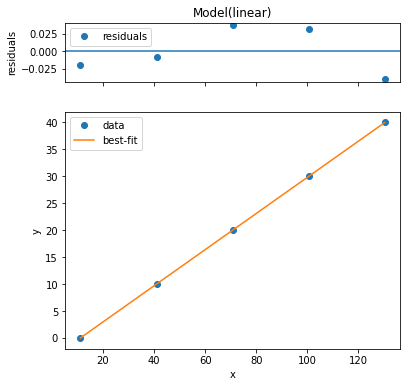

In [61]:
Hg_fit = model_fit_and_plot(Hg_cal['Mark number'],Hg_cal['Voltage'])

In [62]:
def Hg_mark_to_volt(mark_number):
    model = LinearModel()
    voltage = model.eval(Hg_fit,x=mark_number)
    return voltage

print(Hg_fit)

Parameters([('slope', <Parameter 'slope', value=0.33540014367702947 +/- 0.000409, bounds=[-inf:inf]>), ('intercept', <Parameter 'intercept', value=-3.7429761708969145 +/- 0.0337, bounds=[-inf:inf]>)])


In [63]:
Hg_data = FHdata['Hg Peaks and Troughs']
Hg_data

,Number,Peak,Trough
0,1,31.2,36.3
1,2,44.9,50.6
2,3,59.3,65.3
3,4,74.0,80.2
4,5,88.7,95.3
5,6,104.5,111.1
6,7,119.4,126.7


In [64]:
Hg_data['Peak Voltage'] = Hg_mark_to_volt(Hg_data['Peak'])
Hg_data['Trough Voltage'] = Hg_mark_to_volt(Hg_data['Trough'])
Hg_data

,Number,Peak,Trough,Peak Voltage,Trough Voltage
0,1,31.2,36.3,6.721508,8.432049
1,2,44.9,50.6,11.316490,13.228271
2,3,59.3,65.3,16.146252,18.158653
3,4,74.0,80.2,21.076634,23.156115
4,5,88.7,95.3,26.007017,28.220658
5,6,104.5,111.1,31.306339,33.519980
6,7,119.4,126.7,36.303801,38.752222


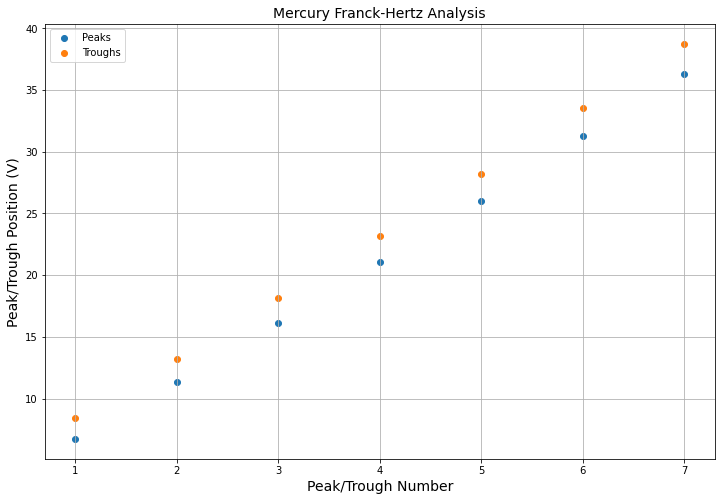

In [65]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

xdata2 = Hg_data['Number']
ydata_peak = Hg_data['Peak Voltage']
ydata_trough = Hg_data['Trough Voltage'][Hg_data['Trough Voltage'] > 0]
plt.scatter(xdata2, ydata_peak, label = 'Peaks')
plt.scatter(xdata2, ydata_trough, label = 'Troughs')

plt.legend();

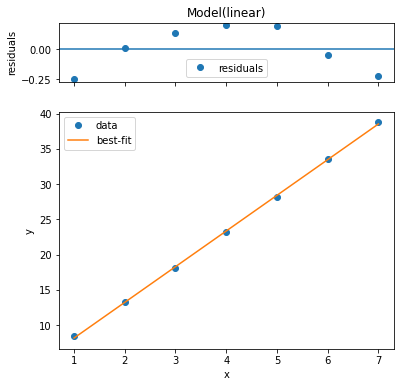

In [66]:
# Line fit, troughs
Hg_trough_line = model_fit_and_plot(xdata2,Hg_data['Trough Voltage'])

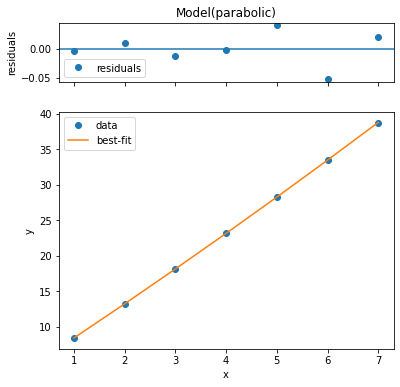

In [67]:
# Quadratic fit, troughs
Hg_trough_quad = model_fit_and_plot(xdata2,Hg_data['Trough Voltage'],model=QuadraticModel())

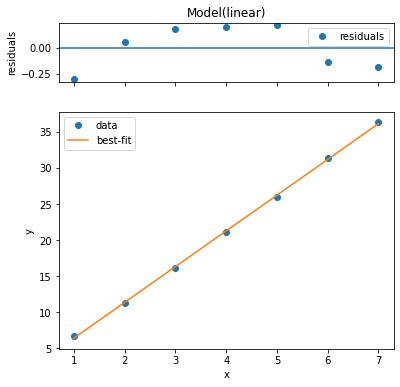

In [68]:
# Line fit, peaks
Hg_peak_line = model_fit_and_plot(xdata2,Hg_data['Peak Voltage'])

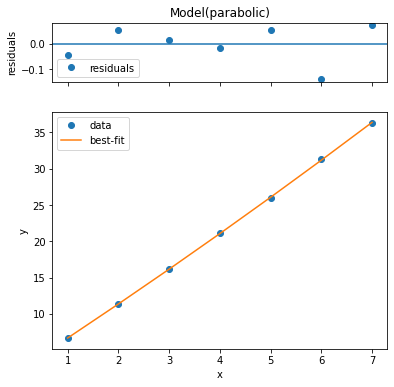

In [69]:
# Quadratic fit, peaks
Hg_peak_quad = model_fit_and_plot(xdata2,Hg_data['Peak Voltage'],model=QuadraticModel())

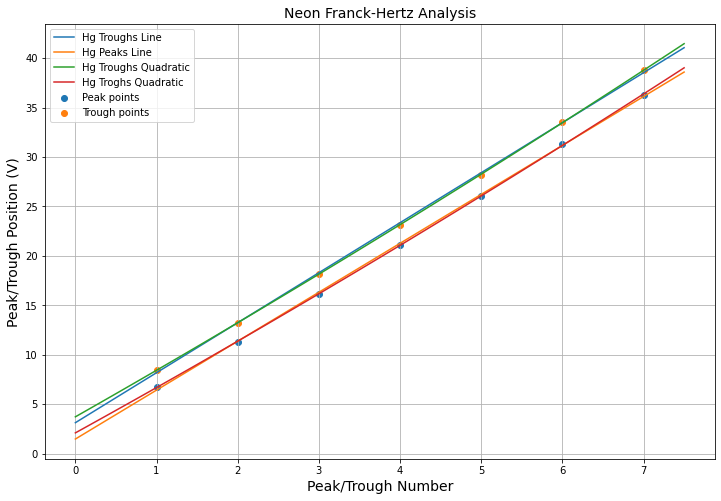

In [70]:
xfit = np.linspace(0,7.5,100) 

line_model = LinearModel()
trough_line = line_model.eval(Hg_trough_line,x=xfit)
peak_line = line_model.eval(Hg_peak_line,x=xfit)

quad_model = QuadraticModel()
trough_quad = quad_model.eval(Hg_trough_quad,x=xfit)
peak_quad = quad_model.eval(Hg_peak_quad,x=xfit)

plt.figure(figsize=(12,8))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

plt.scatter(xdata2,Hg_data['Peak Voltage'], label = 'Peak points')
plt.scatter(xdata2,Hg_data['Trough Voltage'], label = 'Trough points')

#Lines
plt.plot(xfit,trough_line, label = 'Hg Troughs Line')
plt.plot(xfit,peak_line, label = 'Hg Peaks Line')

#Quads
plt.plot(xfit,trough_quad, label = 'Hg Troughs Quadratic')
plt.plot(xfit,peak_quad, label = 'Hg Troghs Quadratic')

plt.legend();

In [71]:
Hg_data

,Number,Peak,Trough,Peak Voltage,Trough Voltage
0,1,31.2,36.3,6.721508,8.432049
1,2,44.9,50.6,11.316490,13.228271
2,3,59.3,65.3,16.146252,18.158653
3,4,74.0,80.2,21.076634,23.156115
4,5,88.7,95.3,26.007017,28.220658
5,6,104.5,111.1,31.306339,33.519980
6,7,119.4,126.7,36.303801,38.752222


In [72]:
delta_Hg_peak = np.diff(Hg_data['Peak Voltage'])
delta_Hg_trough = np.diff(Hg_data['Trough Voltage'])

print('List of Hg peak differences (V):', delta_Hg_peak)
print('List of Hg trough differences (V):', delta_Hg_trough)

List of Hg peak differences (V): [4.59498197 4.82976207 4.93038211 4.93038211 5.29932227 4.99746214]
List of Hg trough differences (V): [4.79622205 4.93038211 4.99746214 5.06454217 5.29932227 5.23224224]


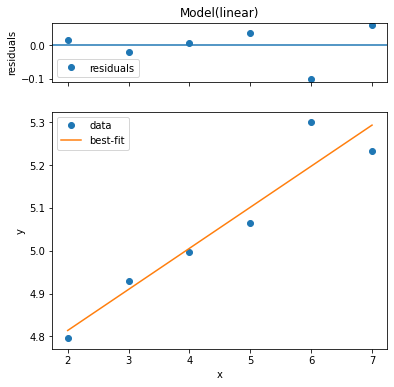

In [73]:
# Line fit to trough diffs
delta_fit_trough_Hg = model_fit_and_plot(xdata2[1:7],delta_Hg_trough)

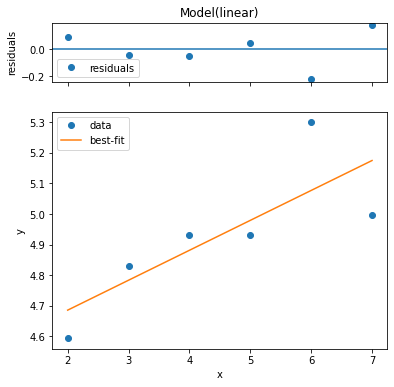

In [74]:
# Line fit to peak diffs
delta_fit_peak_Hg = model_fit_and_plot(xdata2[1:7],delta_Hg_peak)

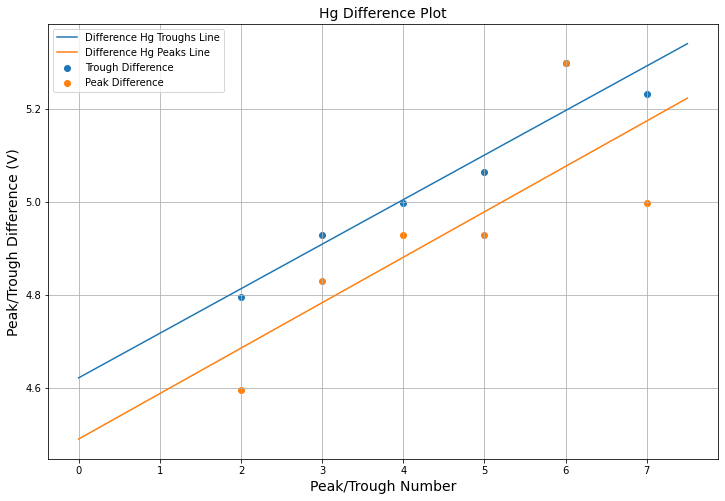

In [75]:
# Plot
line_model = LinearModel()
delta_trough_line_Hg = line_model.eval(delta_fit_trough_Hg,x=xfit)
delta_peak_line_Hg = line_model.eval(delta_fit_peak_Hg,x=xfit)

plt.figure(figsize=(12,8))
plt.grid()
plt.title('Hg Difference Plot',fontsize=14)
plt.ylabel('Peak/Trough Difference (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

plt.plot(xfit,delta_trough_line_Hg, label = 'Difference Hg Troughs Line')
plt.plot(xfit,delta_peak_line_Hg, label = 'Difference Hg Peaks Line')

plt.scatter(xdata2[1:7],delta_Hg_trough, label = 'Trough Difference')
plt.scatter(xdata2[1:7],delta_Hg_peak, label = 'Peak Difference')

plt.legend();

In [76]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')

p = delta_fit_trough_Hg['intercept'].value
m = delta_fit_trough_Hg['slope'].value

a = Hg_trough_quad['a'].value
b = Hg_trough_quad['b'].value
c = Hg_trough_quad['c'].value

print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\nPeaks analysis:')

p = delta_fit_peak_Hg['intercept'].value
m = delta_fit_peak_Hg['slope'].value

a = Hg_peak_quad['a'].value
b = Hg_peak_quad['b'].value
c = Hg_peak_quad['c'].value

print('p = b-a: {:.2f} = {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m = 2a: {:.2f} = {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF MERCURY FROM DIFFERENT METHODS')

#Ea_trad_pk = delta_fit_peak_Hg['slope'].value
#Ea_trad_tr = delta_fit_trough_Hg['slope'].value

Ea_trad_pk = np.mean(delta_Hg_peak)
Ea_trad_tr = np.mean(delta_Hg_trough)


print('"Traditional" average peak spacing: {:.2f} V'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2f} V'.format(Ea_trad_tr))

Ea_quad_trough = Hg_trough_quad['b'].value
Ea_RSB_trough =delta_fit_trough_Hg['intercept'].value + delta_fit_trough_Hg['slope'].value/2

Ea_quad_peak = Hg_peak_quad['b'].value
Ea_RSB_peak = delta_fit_peak_Hg['intercept'].value + delta_fit_peak_Hg['slope'].value/2

print('\nRSB method using line fit to peak/trough position differences')
print('Trough: {:.2f} V'.format(Ea_RSB_trough))
print('Peak: {:.2f} V'.format(Ea_RSB_peak))

print('\nRSB method using quadratic fit to peak/trough positions')
print('Trough: {:.2f} V'.format(Ea_quad_trough))
print('Peak: {:.2f} V'.format(Ea_quad_peak))

CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p ?= b-a: 4.62 ?= 4.61 = 4.66-0.05
m ?= 2a: 0.10 ?= 0.10 = 2*0.05

Peaks analysis:
p = b-a: 4.49 = 4.48 = 4.53-0.05
m = 2a: 0.10 = 0.10 = 2*0.05


CALCULATION OF FIRST EXCITED STATE OF MERCURY FROM DIFFERENT METHODS
"Traditional" average peak spacing: 4.93 V
"Traditional" average trough spacing: 5.05 V

RSB method using line fit to peak/trough position differences
Trough: 4.67 V
Peak: 4.54 V

RSB method using quadratic fit to peak/trough positions
Trough: 4.66 V
Peak: 4.53 V


## Calculation of mean free path $\lambda$

In [77]:
L = unc.ufloat(1,.1) #cm

print('CALCULATION OF MEAN FREE PATH, RSB METHOD\n')

a = Hg_trough_quad['a'].value
b = Hg_trough_quad['b'].value

mean_path_trough = L*a/b

a = Hg_peak_quad['a'].value
b = Hg_peak_quad['b'].value

mean_path_peak = L*a/b

print('Mean free path from troughs fit = {:.2uP} cm'.format(mean_path_trough))
print('Mean free path from peaks fit = {:.2uP} cm'.format(mean_path_peak))

print('Mean free path from RSB paper = 0.017 cm')


CALCULATION OF MEAN FREE PATH, RSB METHOD

Mean free path from troughs fit = 0.0106±0.0011 cm
Mean free path from peaks fit = 0.0114±0.0011 cm
Mean free path from RSB paper = 0.017 cm
